The sinking of the Titanic is one of the biggest maritime disaster in the history, killing 1502 out of 2224 passengers and the crew. One of the reasons for such loss was that there were not enough lifeboats. Some groups of people were more likely to survive than others, such as women, children, and the upper-class.
Objective:
•
Use logistic regression to predict the survival of a given passenger based on features, such as sex, age

In [ ]:
#STEPS
1. Read the data
2. Address missing values
3. Convert categorical to numeric values.
4. Find the correlation between variables.
5. Use logistic regression to predict survival.
6. Evaluate the model using classification report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df['Embarked'].value_counts()
# C = Cherbourg; Q = Queenstown; S = Southampton

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df = df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

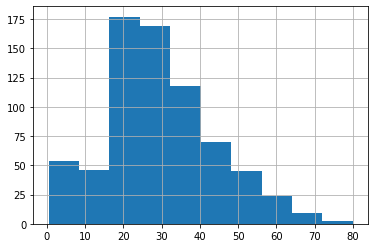

In [12]:
# Missing value imputation - Age.
df['Age'].hist()

Age is rightly skewed. So, filling it will mean will not be appropriate. Hence, we can fill it with median.

In [13]:
df.groupby('Pclass').median()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1,37.0,0,0,60.2875
2,0,29.0,0,0,14.2500
3,0,24.0,0,0,8.0500


Median age for Class 1 is 37, Class 2 is 29 and Class 3 is 24 . Write a function to return the approx. age based on Class.

In [14]:
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]
    if (pd.isnull(age)):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age
        


In [15]:
df['Age'] = df[['Age','Pclass']].apply(age_approx,axis=1)

In [16]:
df.isnull().sum()
# Drop all the records with null values.
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
# Dtypes - Sex and Embarked are categorical. They need to be converted to numeric so that they can be passed to the machine learning algorithm. Otherwise, the algorithm throws error.
df.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
df_dummies_sex = pd.get_dummies(df,columns=['Sex'])

In [20]:
df_dummies = pd.get_dummies(df_dummies_sex, columns=['Embarked'])

In [21]:
df = df_dummies

<AxesSubplot:>

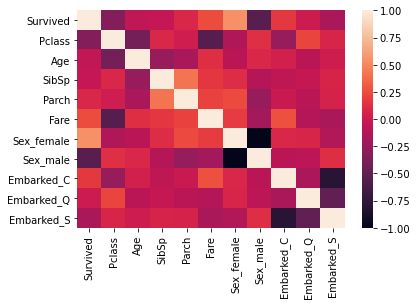

In [22]:
# find correlation between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [23]:
corr_matrix['Survived'].abs().sort_values(ascending=False)

Survived      1.000000
Sex_male      0.541585
Sex_female    0.541585
Pclass        0.335549
Fare          0.255290
Embarked_C    0.169966
Embarked_S    0.151777
Parch         0.083151
Age           0.052051
SibSp         0.034040
Embarked_Q    0.004536
Name: Survived, dtype: float64

In [24]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [25]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=100)

In [26]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(711, 10)
(178, 10)
(711,)
(178,)


In [27]:
logReg = LogisticRegression()

In [28]:
logReg.fit(xtrain,ytrain)

C:\Users\srivi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = logReg.predict(xtest)

In [30]:
print(predictions)

[0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0]


In [31]:
metrics.confusion_matrix(ytest,predictions)

array([[97, 17],
       [20, 44]], dtype=int64)

In [32]:
metrics.accuracy_score(ytest,predictions)

0.7921348314606742

In [33]:
print(metrics.classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.72      0.69      0.70        64

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



In [34]:
logReg.coef_

array([[-1.12869265e+00, -3.86969541e-02, -3.28370757e-01,
        -2.25313776e-02,  1.62557193e-03,  2.19768532e+00,
        -3.79412756e-01,  8.15170294e-01,  5.09550095e-01,
         4.93552176e-01]])

In [35]:
logReg.intercept_

array([2.13589445])

In [36]:
logReg.predict_proba(xtest)

array([[0.91427368, 0.08572632],
       [0.39010849, 0.60989151],
       [0.93581177, 0.06418823],
       [0.42672628, 0.57327372],
       [0.8858797 , 0.1141203 ],
       [0.17968354, 0.82031646],
       [0.90753205, 0.09246795],
       [0.77781707, 0.22218293],
       [0.88560799, 0.11439201],
       [0.30465514, 0.69534486],
       [0.36795867, 0.63204133],
       [0.4605587 , 0.5394413 ],
       [0.64208314, 0.35791686],
       [0.29933392, 0.70066608],
       [0.0914152 , 0.9085848 ],
       [0.88454319, 0.11545681],
       [0.83045931, 0.16954069],
       [0.60343362, 0.39656638],
       [0.65109247, 0.34890753],
       [0.88620866, 0.11379134],
       [0.27945561, 0.72054439],
       [0.2678345 , 0.7321655 ],
       [0.92527659, 0.07472341],
       [0.95395585, 0.04604415],
       [0.05706115, 0.94293885],
       [0.19310329, 0.80689671],
       [0.28470933, 0.71529067],
       [0.88616288, 0.11383712],
       [0.93880721, 0.06119279],
       [0.66243668, 0.33756332],
       [0.